# **Informatyka w medycynie**

# Dno oka

*Grupa dwuosobowa: Ivan Kaliadzich 153936, Mikołaj Diakowski 151843*

## Dodawanie bibliotek

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, restoration
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import imageio as imageio

## Odczytanie obrazu

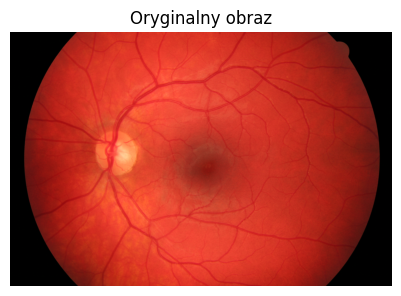

In [44]:
image_path = 'images/04_h.jpg' # obrazy 01-15; h - zdrowe oko, g - oko jaskrowe, dr - 
image = cv2.imread(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Oryginalny obraz')

plt.tight_layout()
plt.axis('off')
plt.show()

## Wstępne przetwarzanie

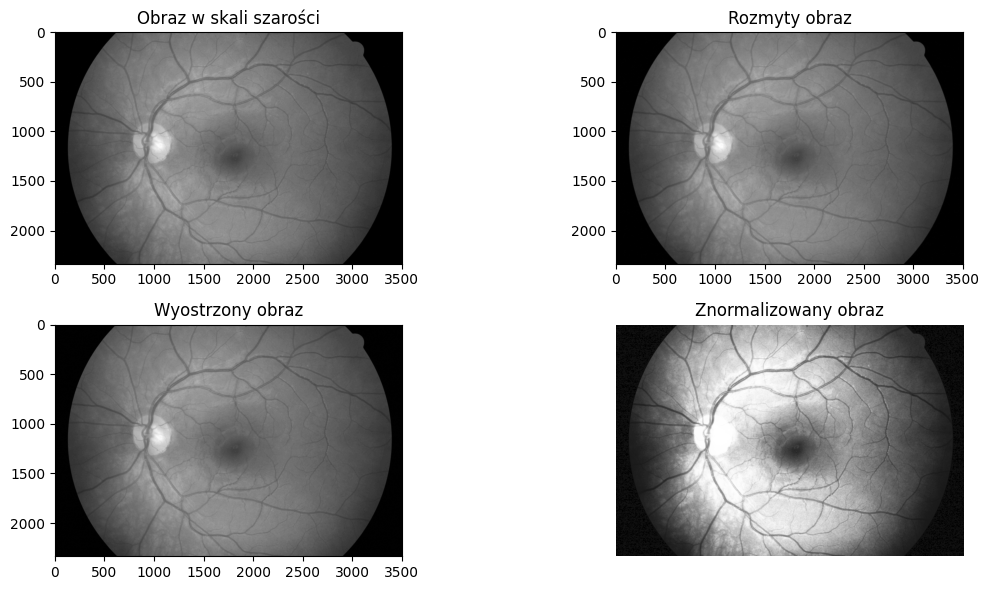

In [48]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # w szkali szarości
blurry_image = cv2.blur(gray_image, (5,5)) # rozmyty obraz
sharpen_image = cv2.filter2D(blurry_image, -1, kernel) # wyostrzony obraz
normilize_image = cv2.equalizeHist(sharpen_image) # znormalizowany obraz

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz w skali szarości')

plt.subplot(2, 2, 2)
plt.imshow(blurry_image, cmap='gray')
plt.title('Rozmyty obraz')

plt.subplot(2, 2, 3)
plt.imshow(sharpen_image, cmap='gray')
plt.title('Wyostrzony obraz')

plt.subplot(2, 2, 4)
plt.imshow(normilize_image, cmap='gray')
plt.title('Znormalizowany obraz')

plt.tight_layout()
plt.axis('off')
plt.show()

## Właściwe przetworzenie obrazu

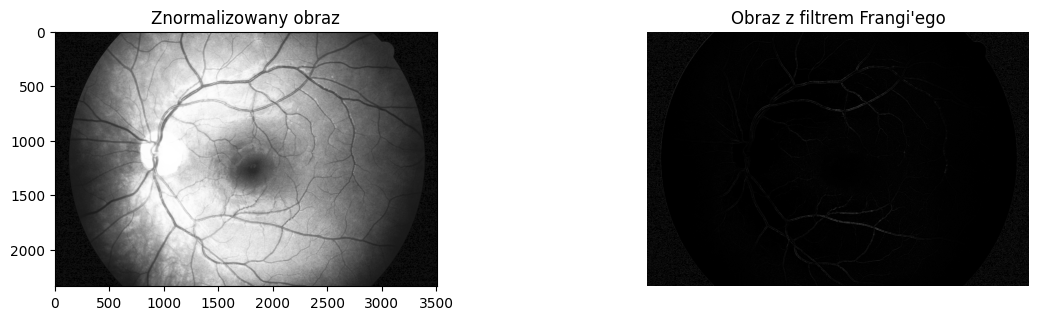

In [49]:
filtered_image = filters.frangi(normilize_image) # Zastosowanie filtru Frangi'ego

plt.figure(figsize = (12,6))

plt.subplot(2,2, 1)
plt.imshow(normilize_image, cmap='gray')
plt.title("Znormalizowany obraz")

plt.subplot(2,2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Obraz z filtrem Frangi'ego")


plt.tight_layout()
plt.axis('off')
plt.show()

## Końcowe przetwarzanie obraz

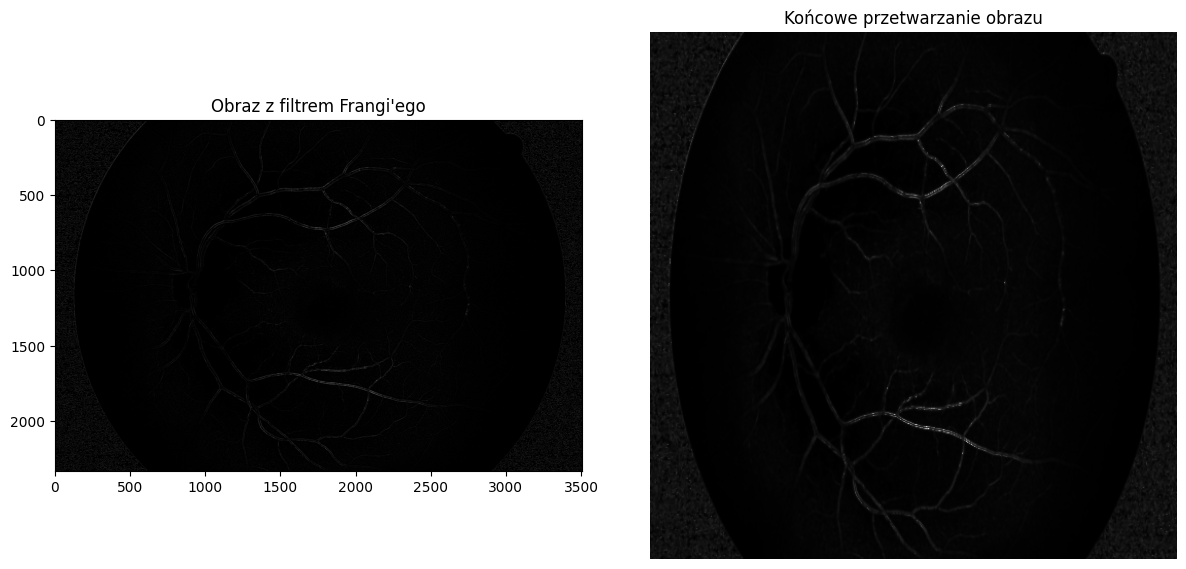

In [66]:
denoised_image = restoration.denoise_tv_chambolle(filtered_image, weight=0.1) # Odszumiony obraz
filled_image = restoration.inpaint_biharmonic(denoised_image, mask=(denoised_image == 0)) # Uzupełnieniony obraz
resized_image = cv2.resize(filled_image, (512, 512))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title("Obraz z filtrem Frangi'ego")

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Końcowe przetwarzanie obrazu')

plt.tight_layout()
plt.axis('off')
plt.show()

## Wizualizacja

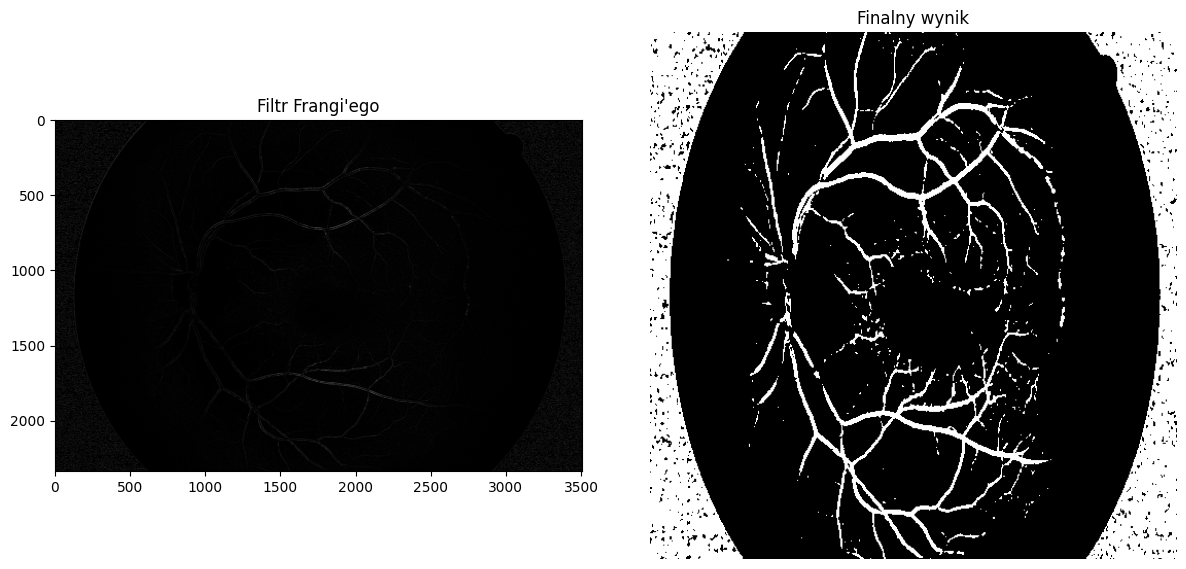

In [70]:
mask = resized_image > 0.01 # wygenerowanie binarnej maski

final_image = resized_image.copy()
final_image[mask] = 255


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtr Frangi\'ego')

plt.subplot(1, 2, 2)
plt.imshow(final_image, cmap='gray')
plt.title('Finalny wynik')


plt.tight_layout()
plt.axis('off')
plt.show()

## Skuteczność algorytmu

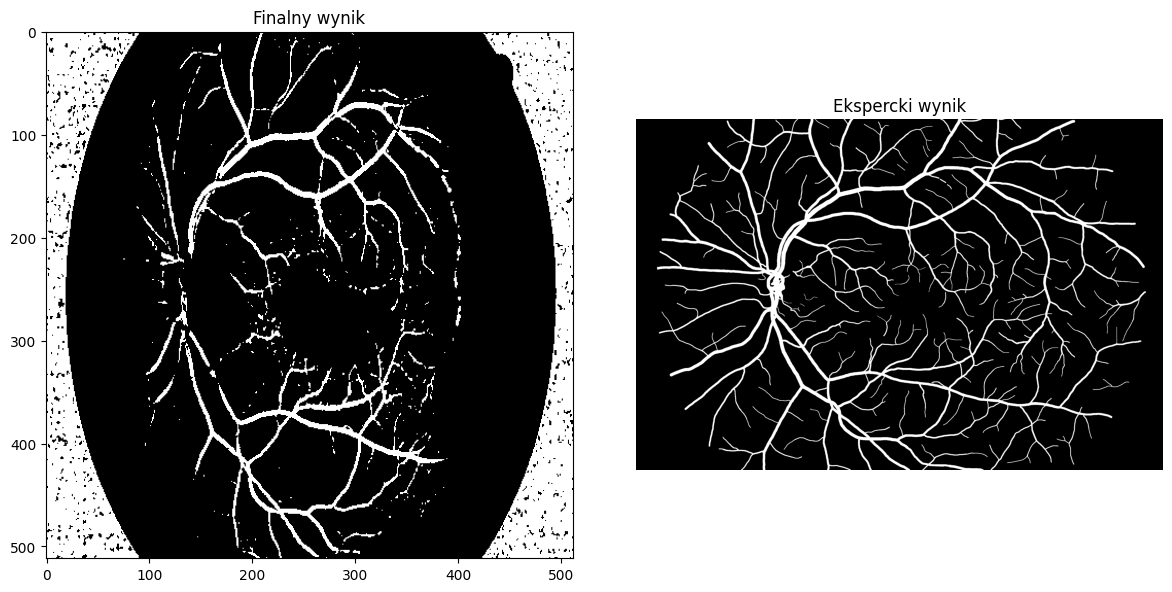

In [71]:
manual_image_path = 'manual1/04_h.tif'
manual_image = cv2.imread(manual_image_path)

gray_manual_image = cv2.cvtColor(manual_image, cv2.COLOR_BGR2GRAY) # Zmiana obrazu na skalę szarości

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(final_image, cmap='gray')
plt.title('Finalny wynik')

plt.subplot(1, 2, 2)
plt.imshow(gray_manual_image, cmap='gray')
plt.title('Ekspercki wynik')

plt.tight_layout()
plt.axis('off')
plt.show()

In [73]:
correct_mask = gray_manual_image > 0 # Wygenerowanie binarnej eksperckiej maski
mask_height, mask_width = mask.shape

# obliczanie macierzy pomyłek
true_positive = 0
false_positive = 0
false_negative = 0
true_negative = 0

for i in range(mask_height):
    for j in range(mask_width):
        if mask[i][j] == True and correct_mask[i][j] == True:
            true_positive += 1
        elif mask[i][j] == True and correct_mask[i][j] == False:
            false_positive += 1
        elif mask[i][j] == False and correct_mask[i][j] == True:
            false_negative += 1
        elif mask[i][j] == False and correct_mask[i][j] == False:
            true_negative += 1

print(true_positive, false_negative, false_positive, true_negative)

850 3403 52213 205678


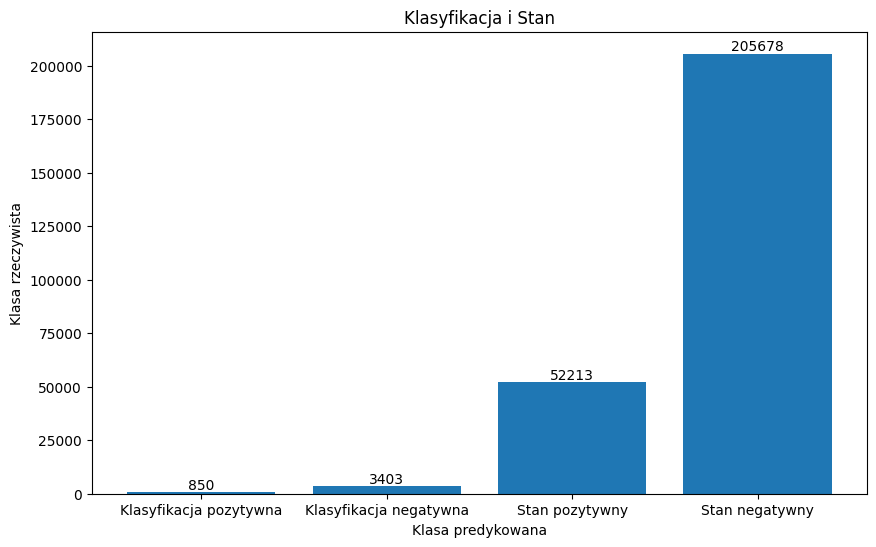

In [77]:
# Dane
values = [true_positive, false_negative, false_positive, true_negative]
labels = ['Klasyfikacja pozytywna', 'Klasyfikacja negatywna', 'Stan pozytywny', 'Stan negatywny']

# Utworzenie jednego wykresu słupkowego dla wszystkich kategorii
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values)

# Dodanie etykiet do osi
ax.set_xlabel("Klasa predykowana")
ax.set_ylabel("Klasa rzeczywista")

# Dodanie tytułu
ax.set_title("Klasyfikacja i Stan")

# Ustawienie wartości na słupkach dla lepszej czytelności
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [78]:
accuracy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)
print("Trafność:" ,accuracy)
sensitivity = (true_positive)/(true_positive + false_negative)
print("Czułość:",sensitivity)
specificity = (true_negative)/(false_positive + true_negative)
print("Swoistość:", specificity)
print("Średnia arytmetyczna czułości i swoistości:",(sensitivity + specificity)/2)

Trafność: 0.787841796875
Czułość: 0.19985892311309664
Swoistość: 0.797538494945539
Średnia arytmetyczna czułości i swoistości: 0.4986987090293178
